# Big Mart

### About the Usecase 

### Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sl
lr = sl.LinearRegression()
import sklearn.tree as tree
dtr = tree.DecisionTreeRegressor()
import sklearn.ensemble as se
rfr = se.RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
import sklearn.metrics as mt
import math
import pickle

### Loading Data or Retrieving the Data

In [2]:
train_df = pd.read_csv("bigmart_train.csv") 
test_df = pd.read_csv("bigmart_test.csv")
df_list = [train_df, test_df]

### Data Cleaning

In [3]:
train_df.shape

(8523, 12)

In [4]:
test_df.shape

(5681, 11)

In [5]:
df = pd.concat(df_list)

In [6]:
df.shape

(14204, 12)

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
mean_iw = df['Item_Weight'].mean()
df.Item_Weight.fillna(value = mean_iw, inplace = True)
mean_ios = df['Item_Outlet_Sales'].mean()
df.Item_Outlet_Sales.fillna(value = mean_ios, inplace = True)
mode_os = df['Outlet_Size'].value_counts().idxmax()
df.Outlet_Size.fillna(value  = mode_os, inplace = True)

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.loc[df.duplicated(), :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Data Visualization

In [13]:
# Separate the categorical_columns and numerical_columns

categorical_columns = []
numerical_columns = []
for col in df.columns:
    if df[col].dtypes == object:
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
print(categorical_columns) 
print(numerical_columns)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


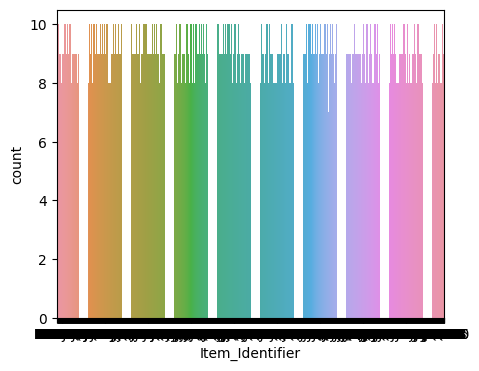

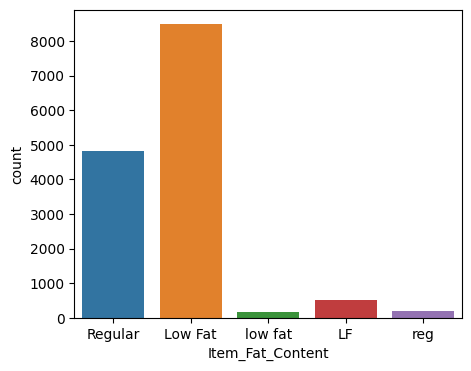

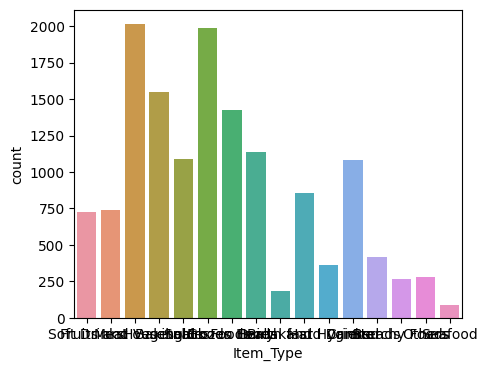

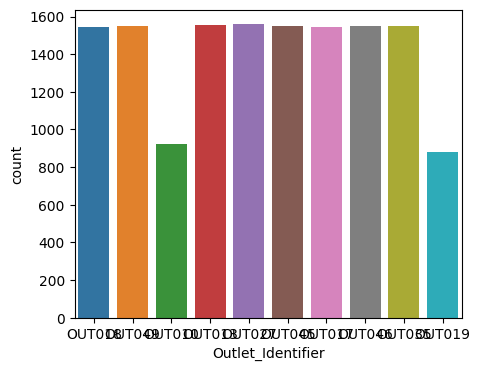

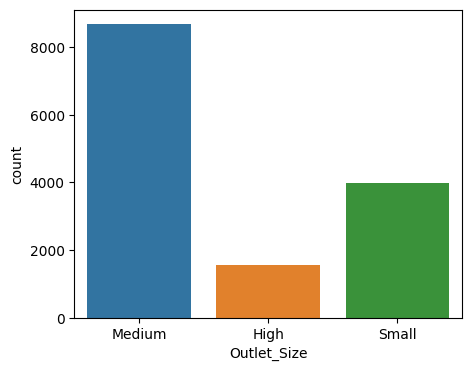

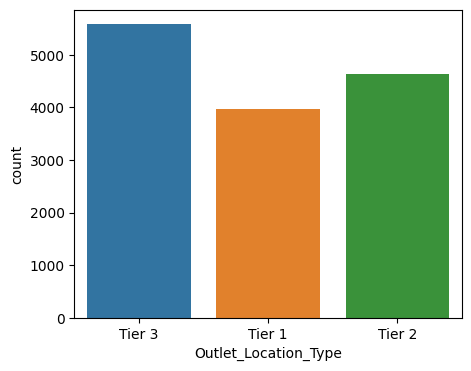

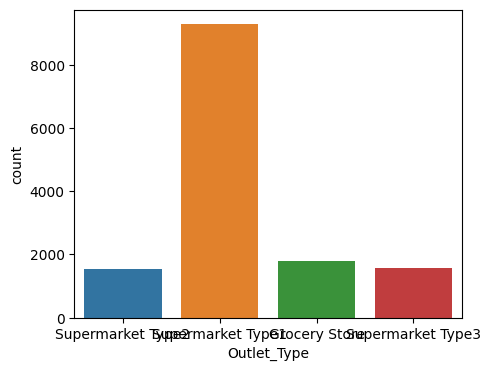

In [14]:
# Visualize the categorical columns by using the count plot
for i in categorical_columns:
    fig,ax = plt.subplots(1,1, figsize=(5,4))
    sns.countplot(x=df[i][1:])

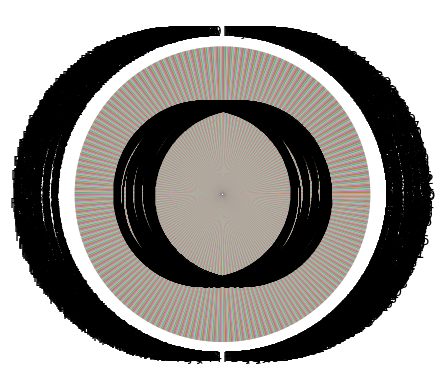

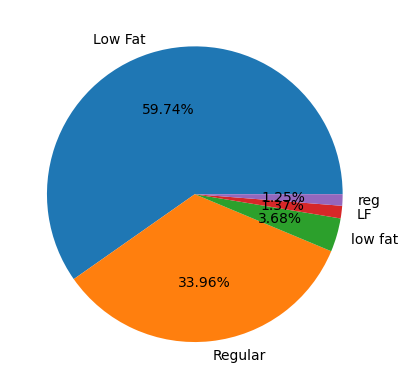

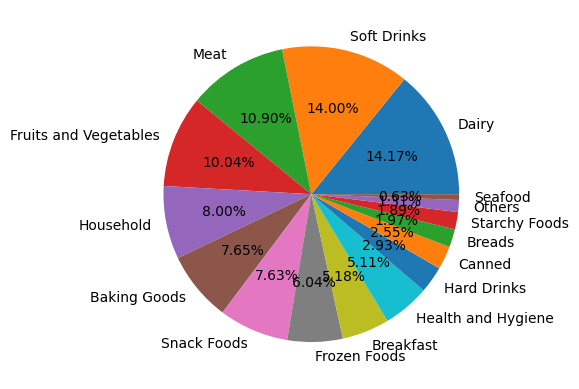

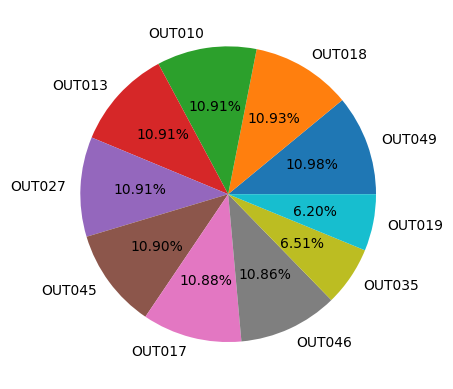

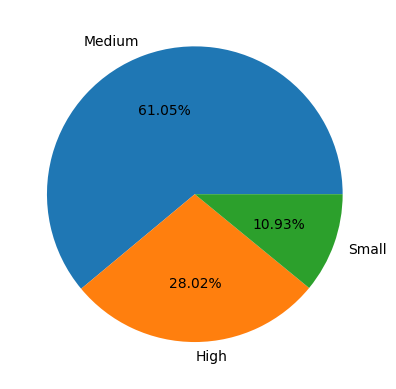

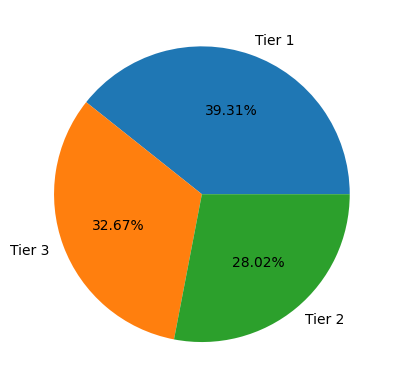

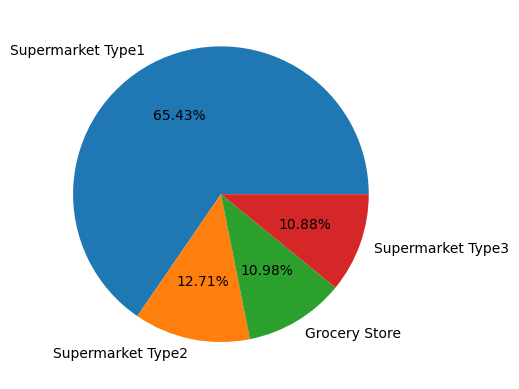

In [15]:
# Visualize the categorical columns by using the pie chart
for c in categorical_columns:
    fig,plt.pie(df[c].value_counts(), labels = df[c].unique(), autopct='%1.2f%%')
    plt.show()

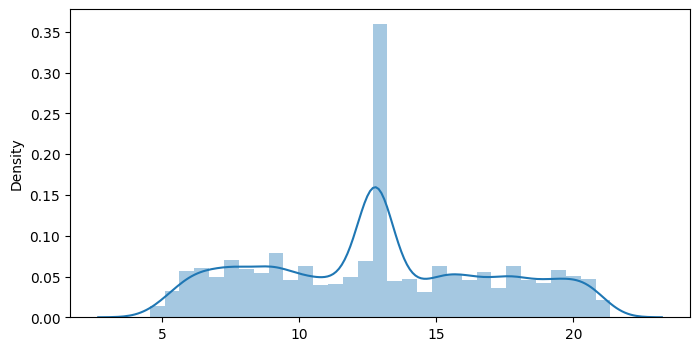

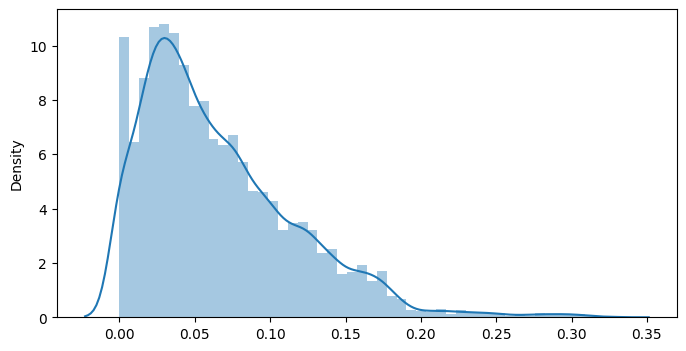

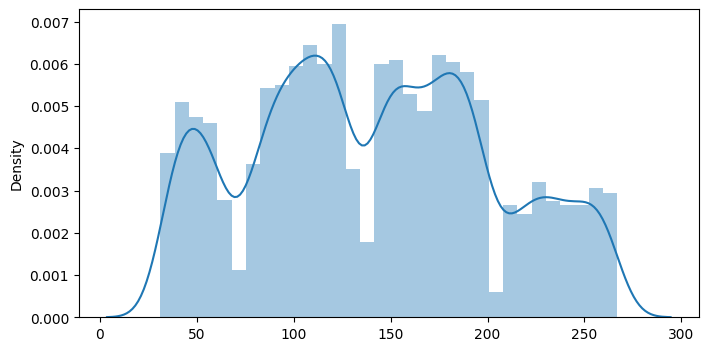

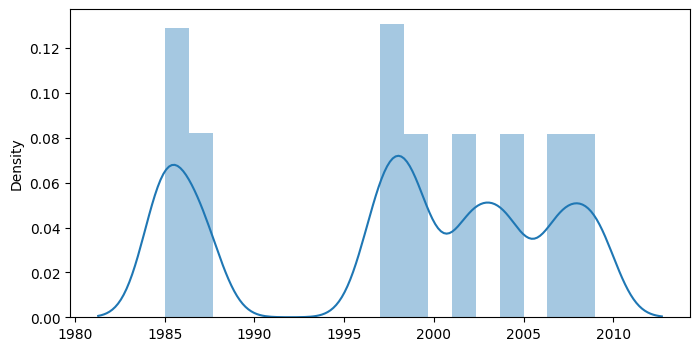

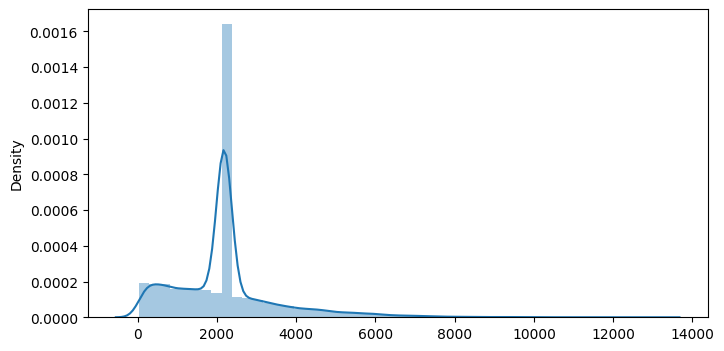

In [16]:
# Visualize the numerical columns using the distplot
for i in numerical_columns:
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    sns.distplot(x = df[i][1:])

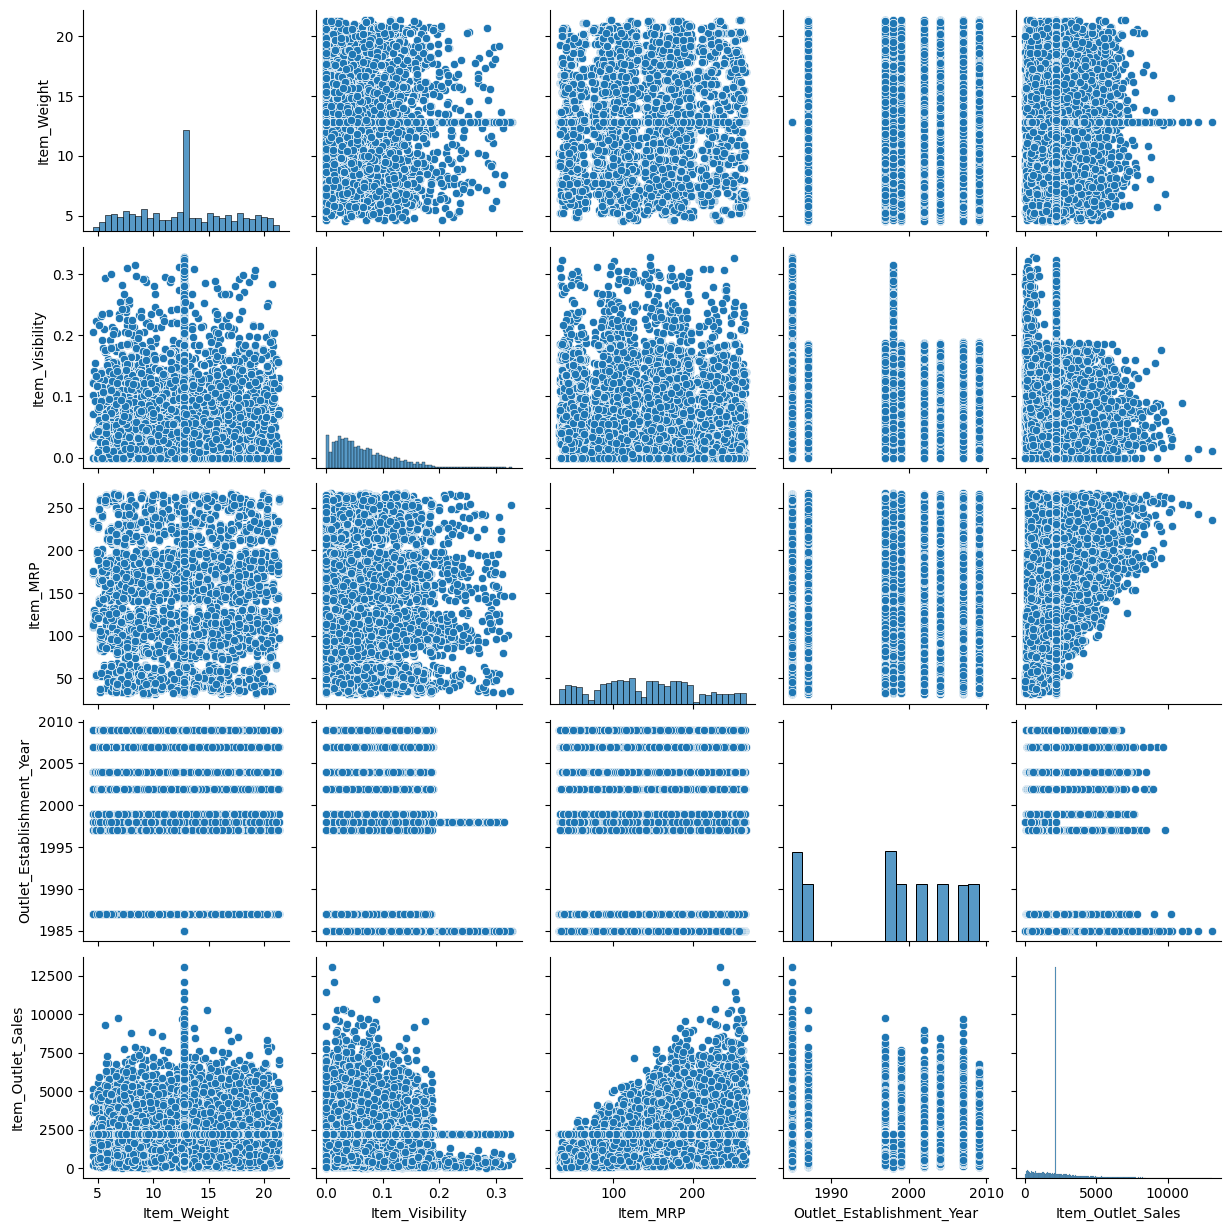

In [17]:
sns.pairplot(df)
plt.show()

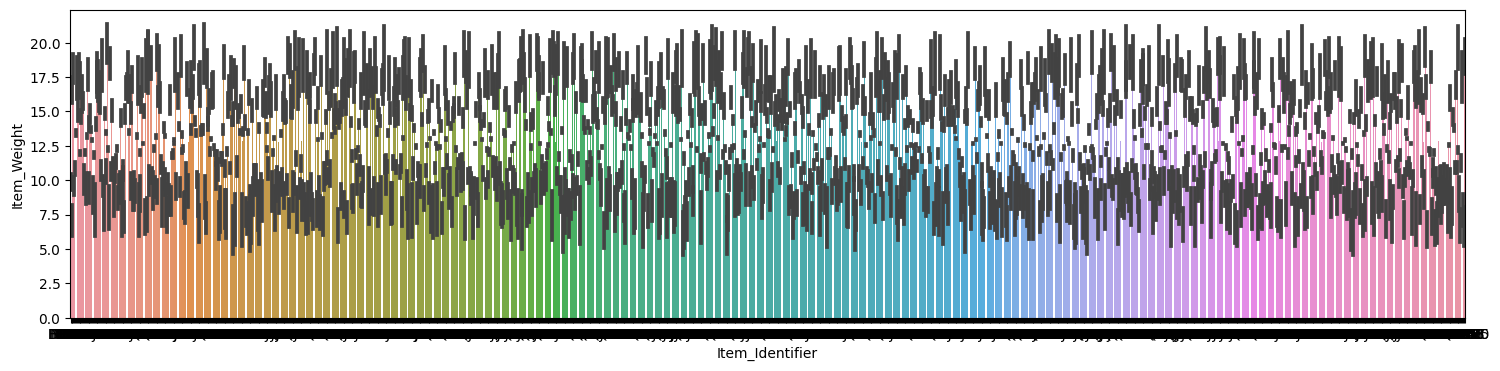

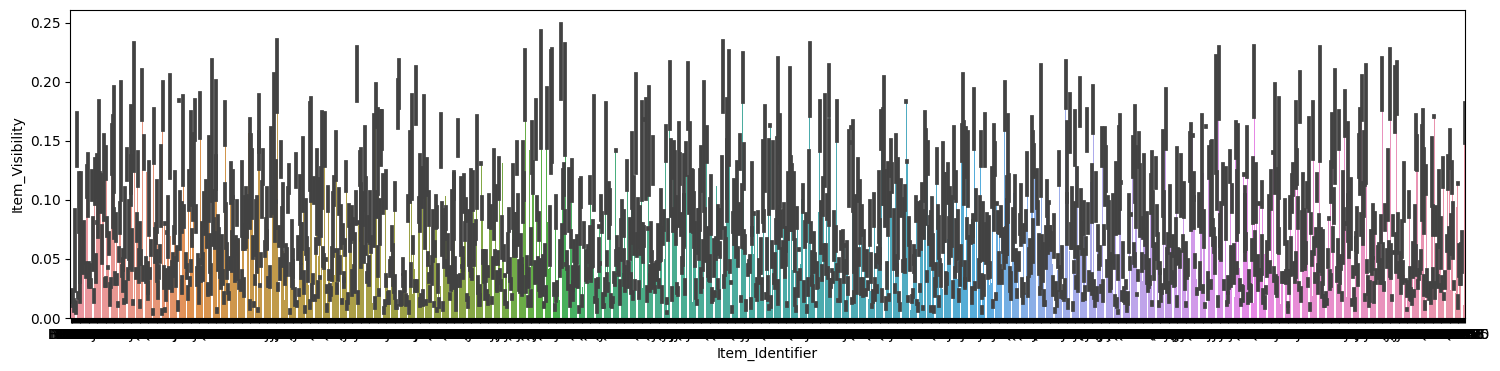

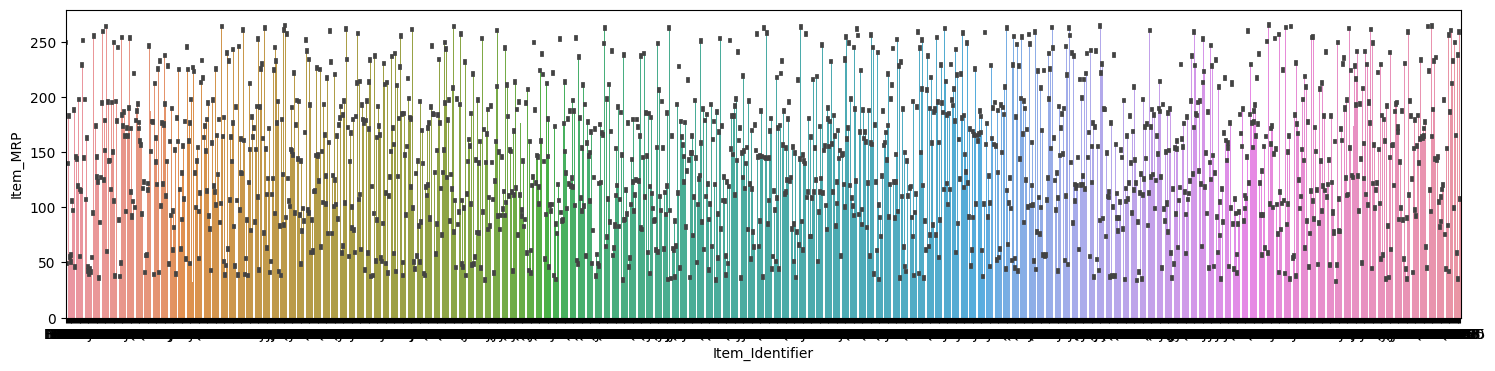

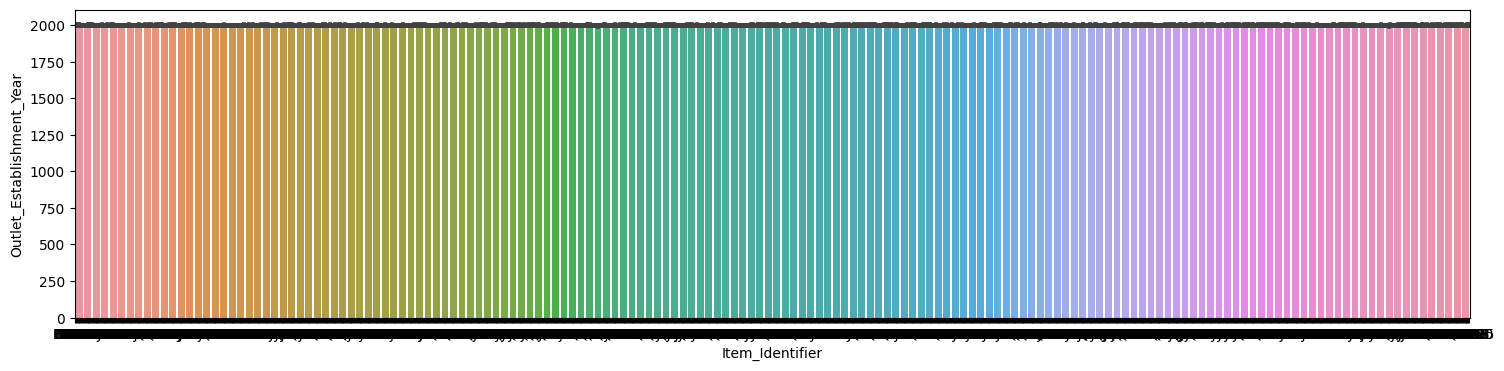

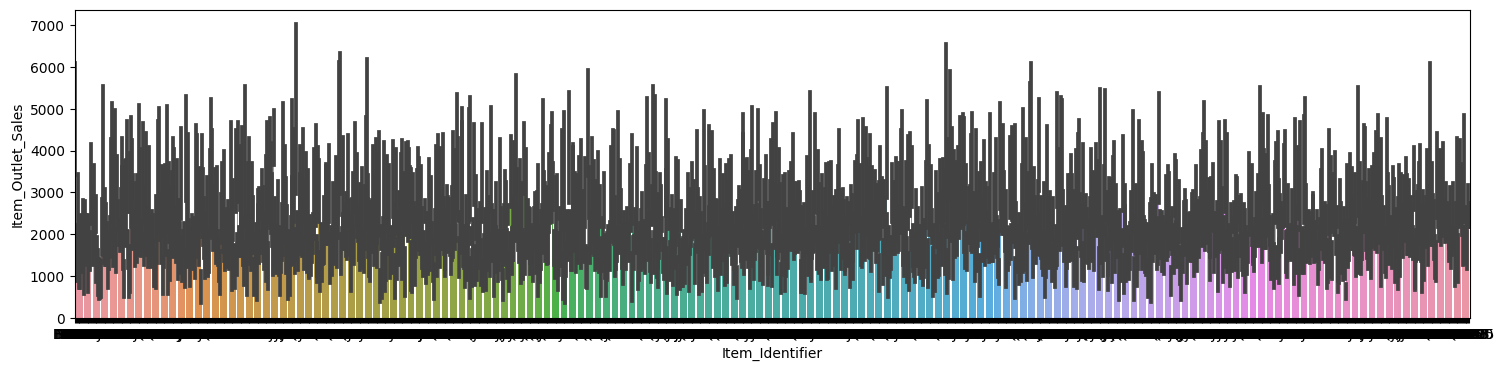

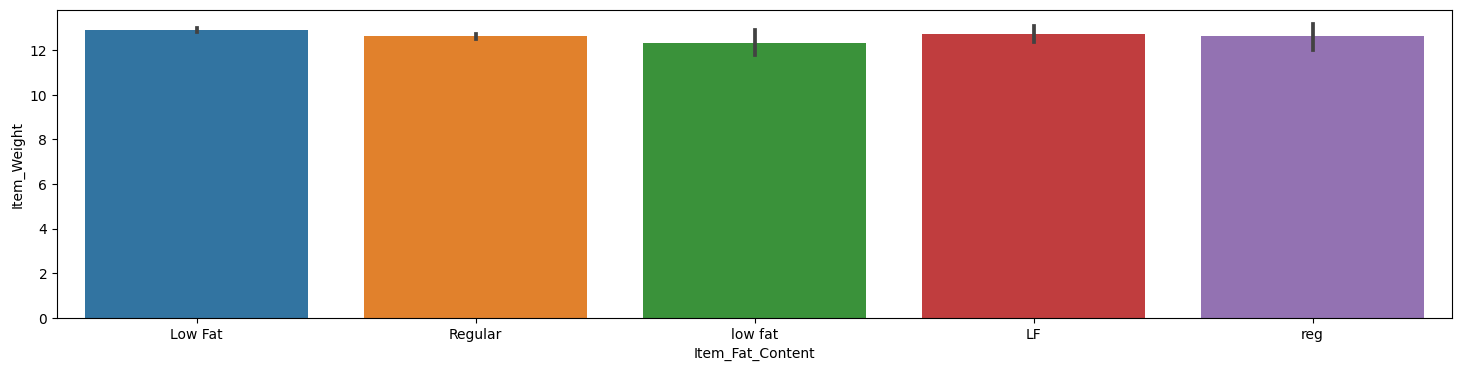

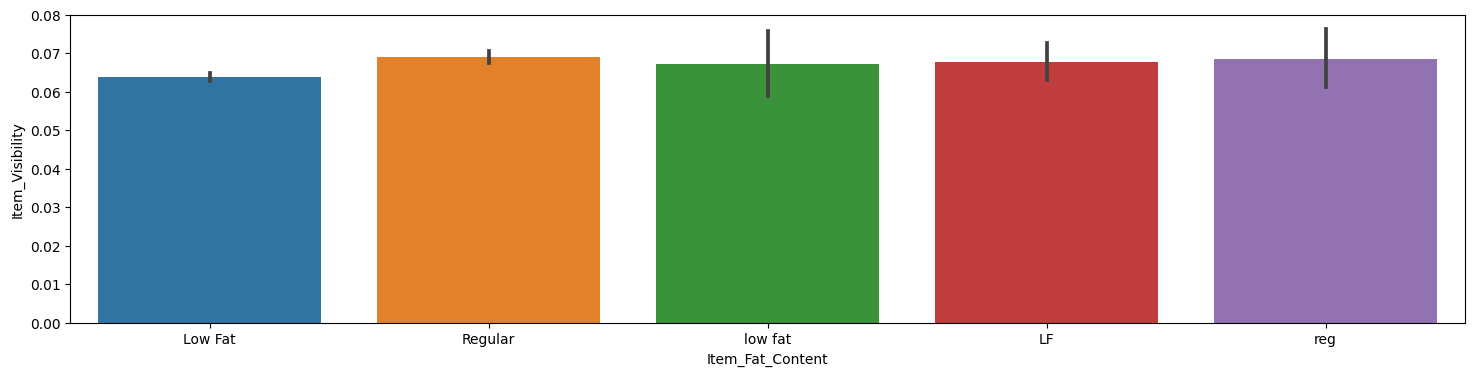

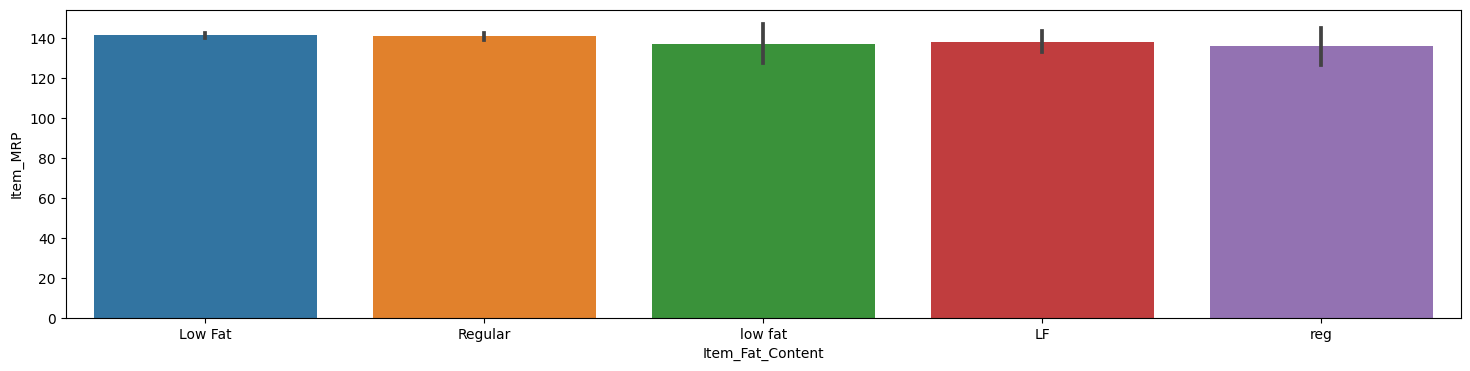

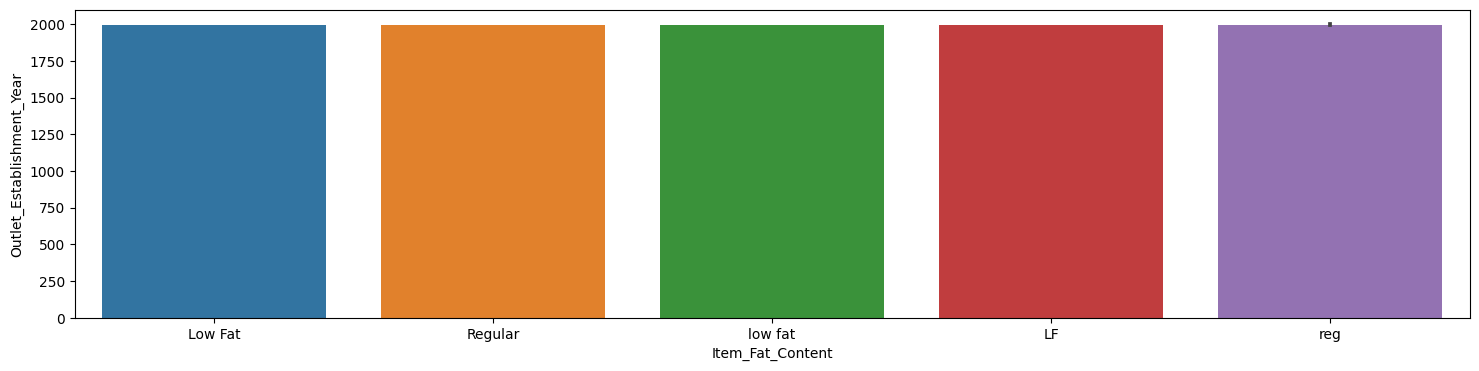

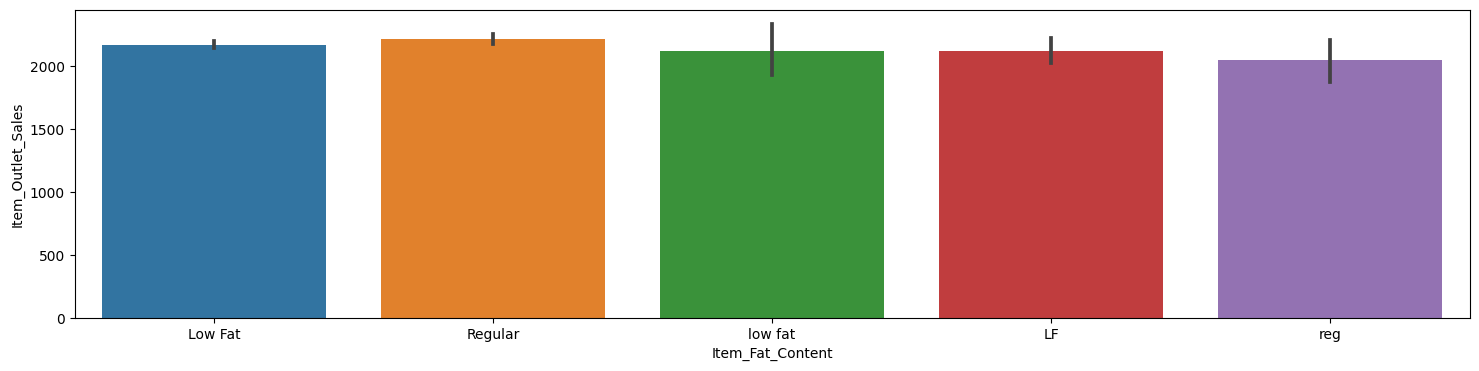

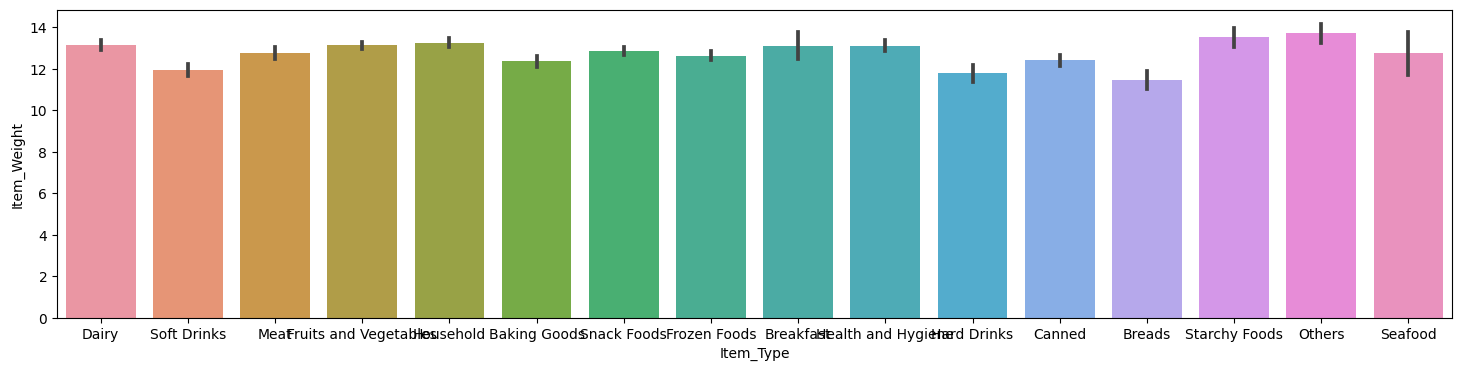

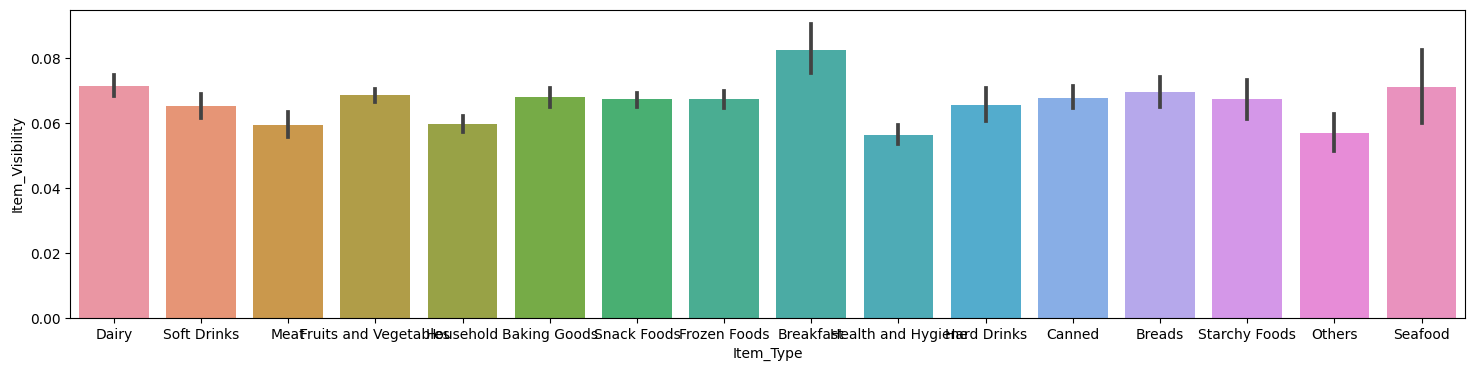

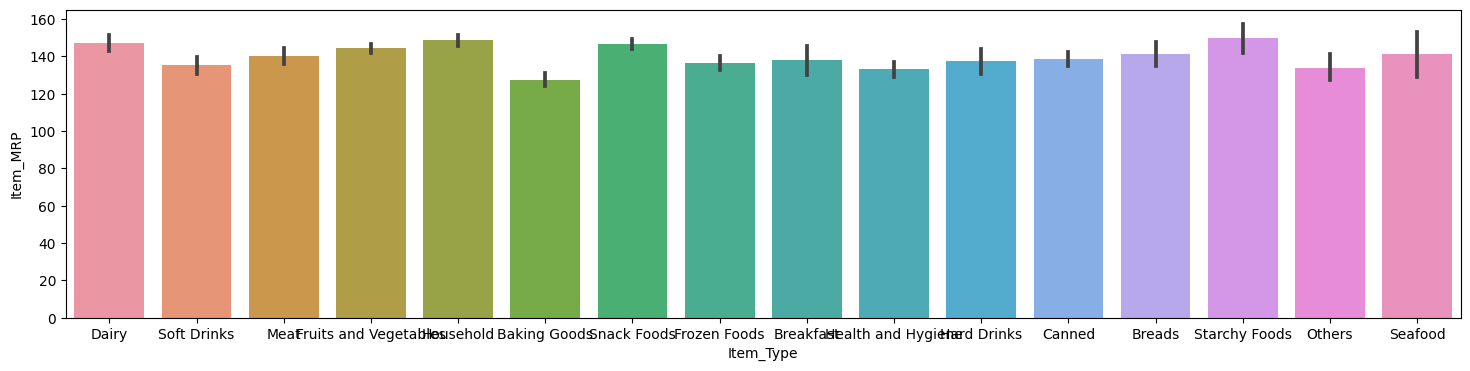

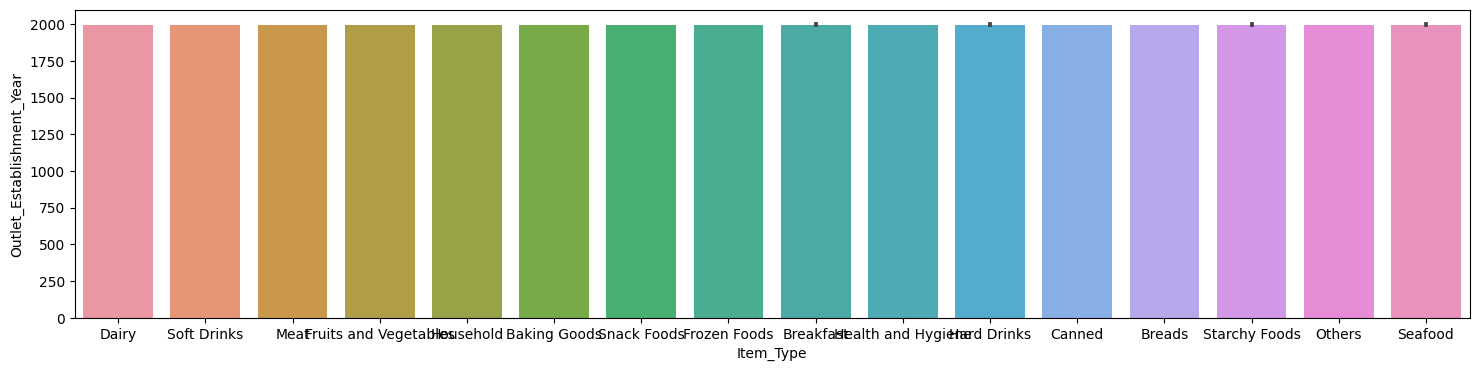

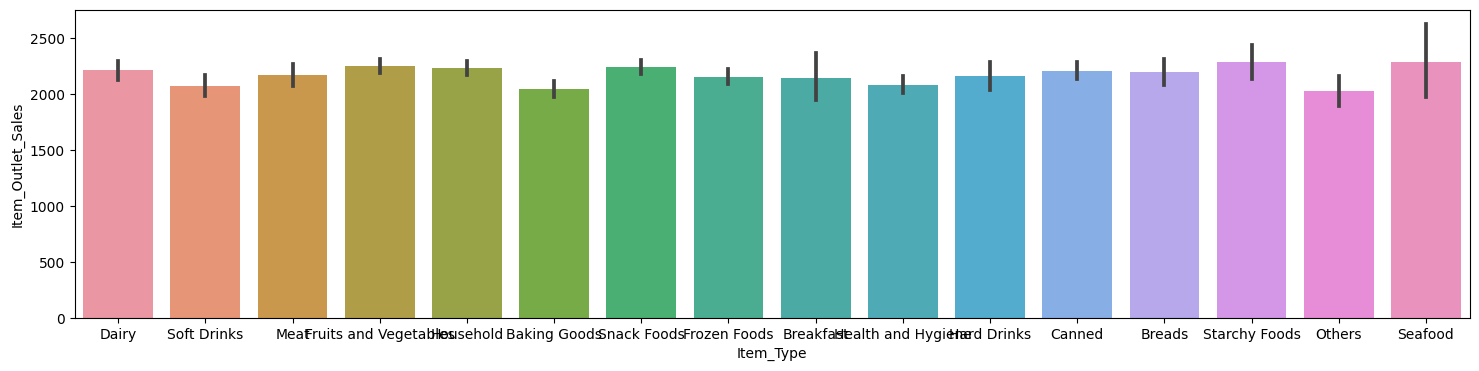

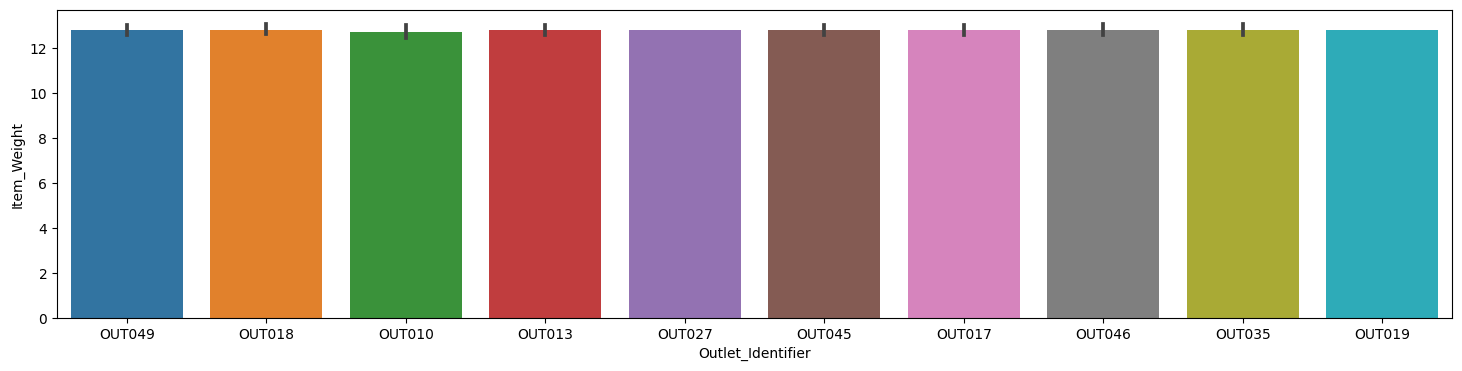

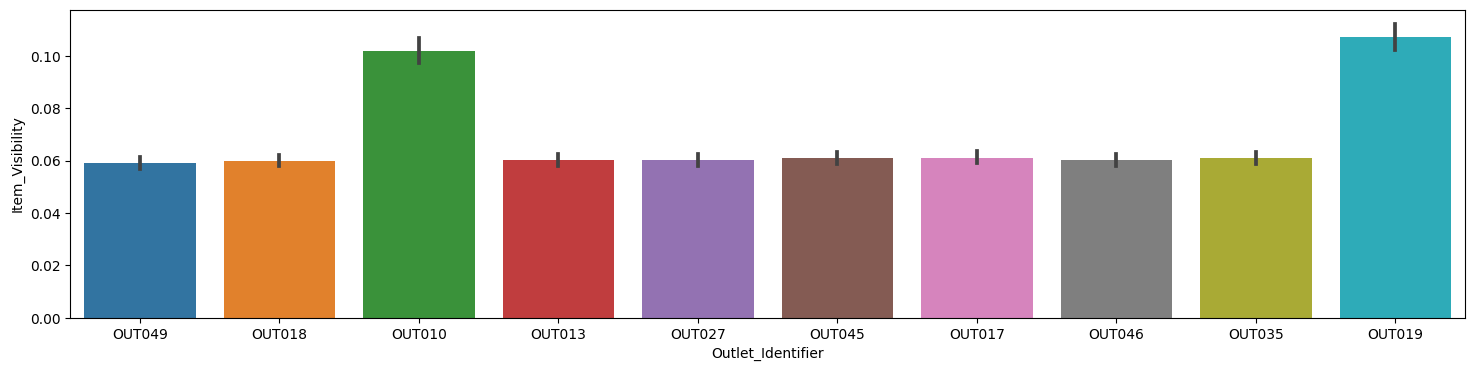

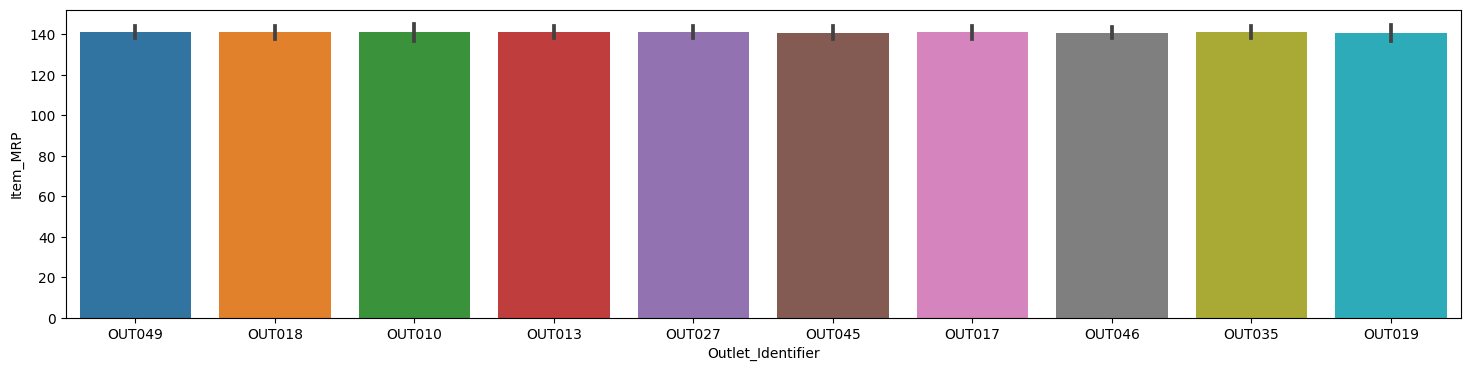

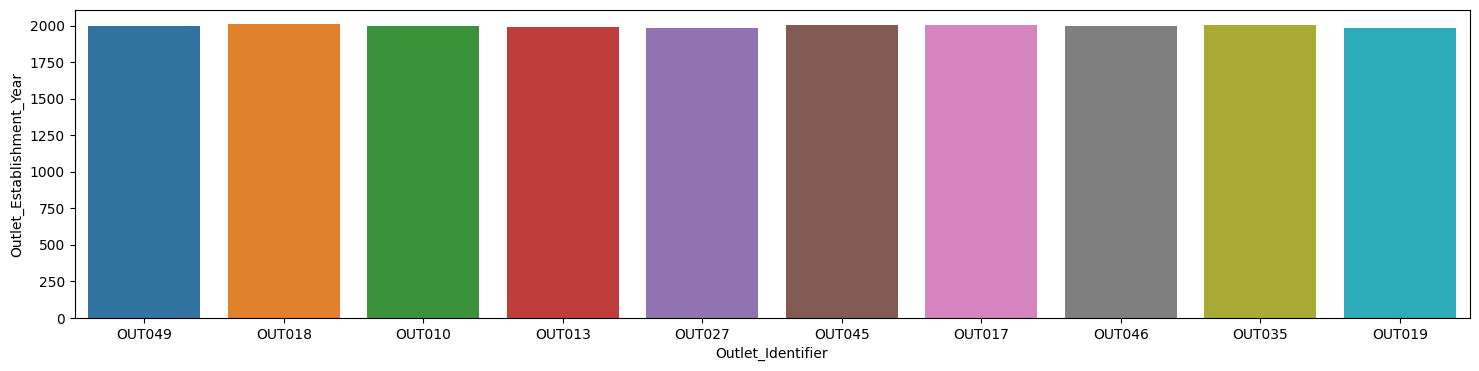

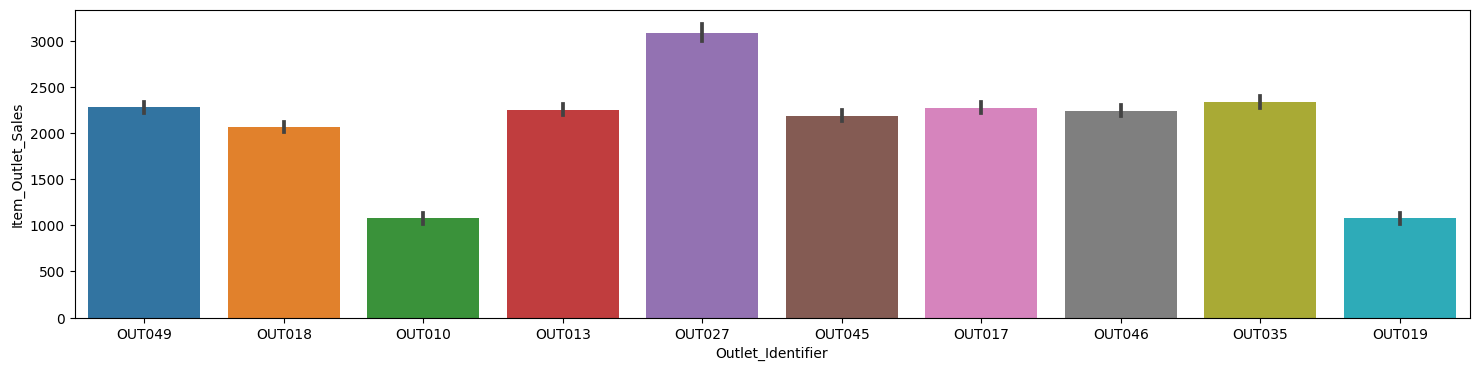

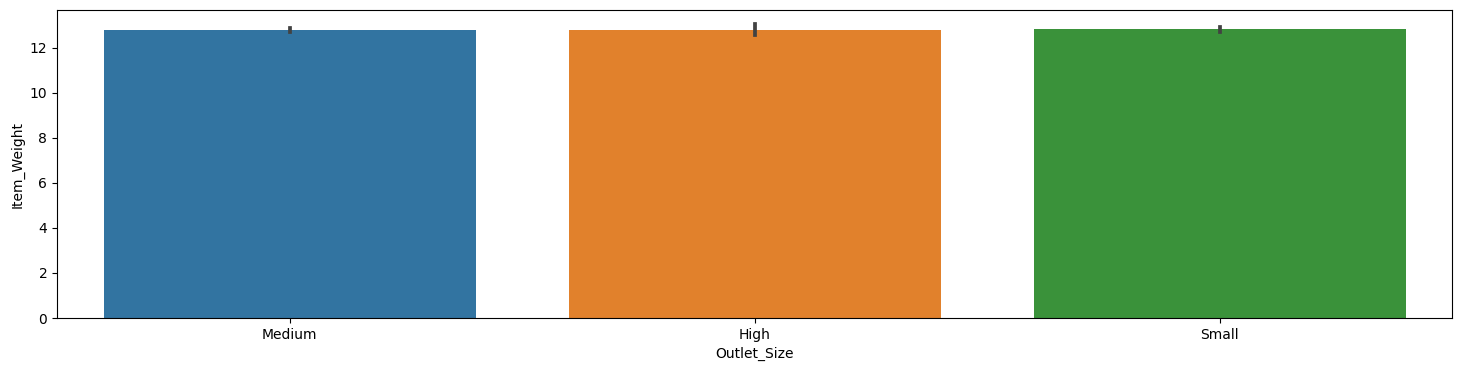

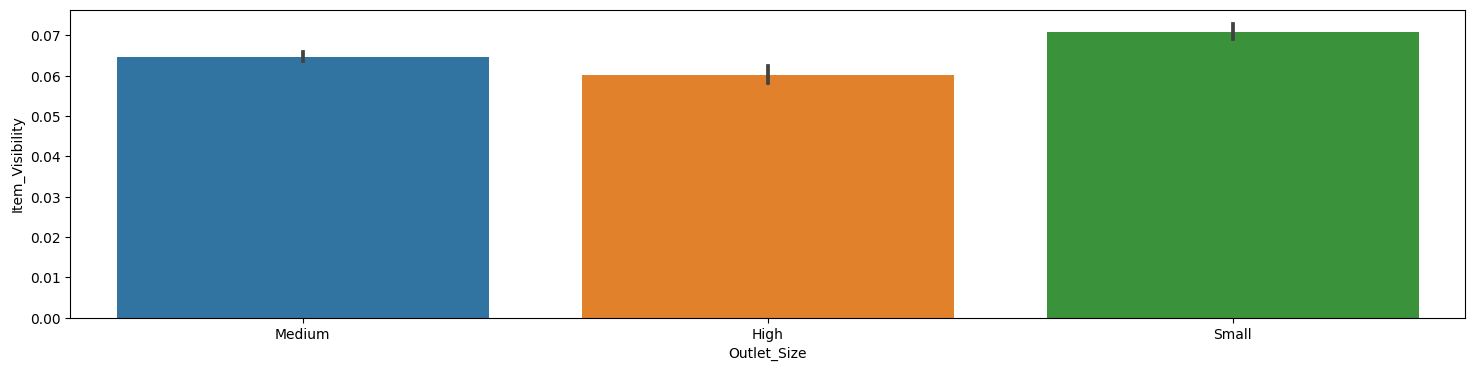

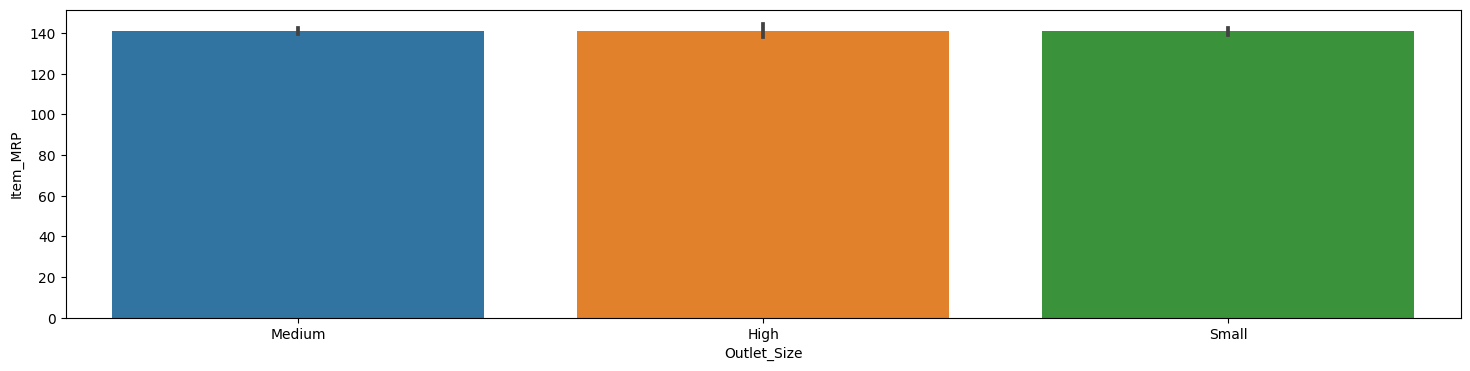

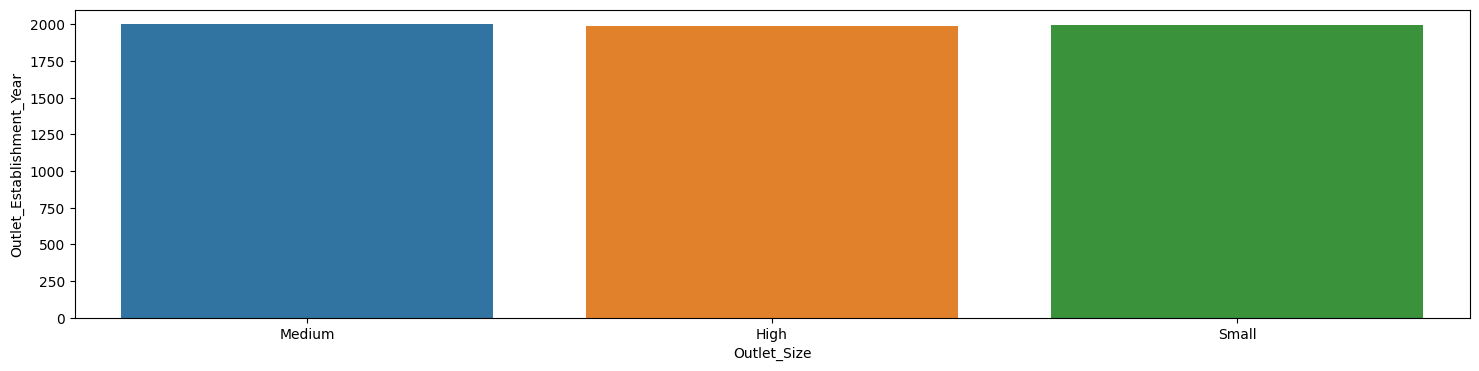

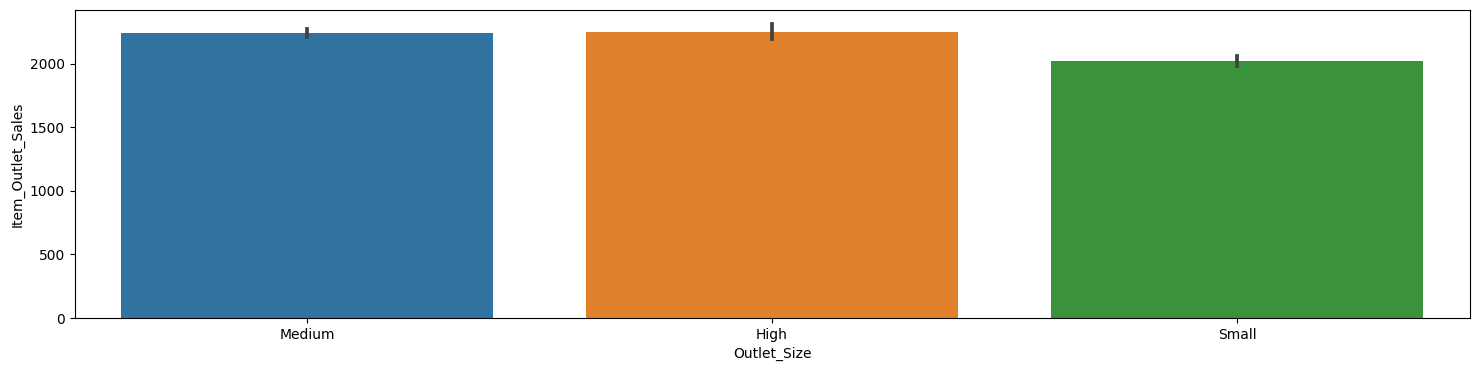

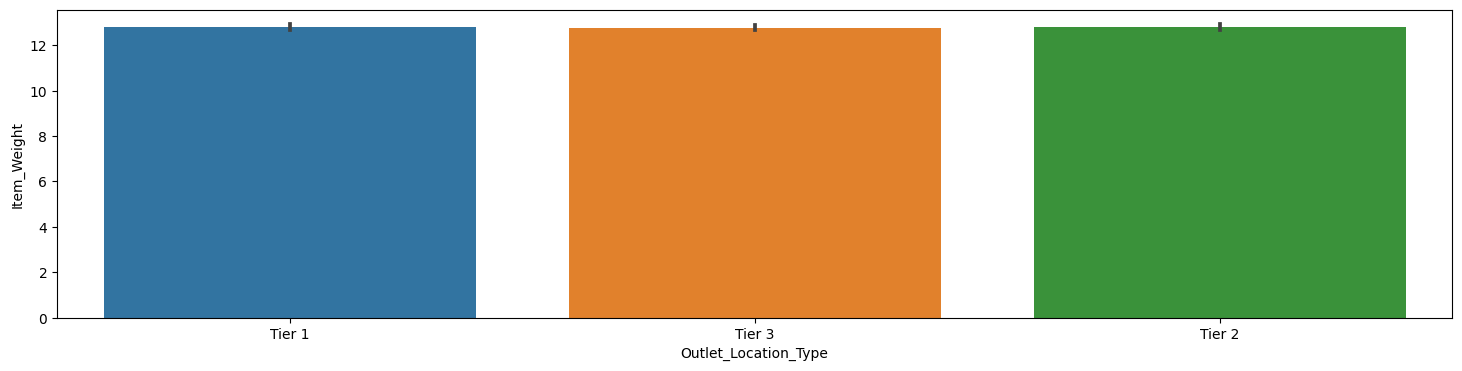

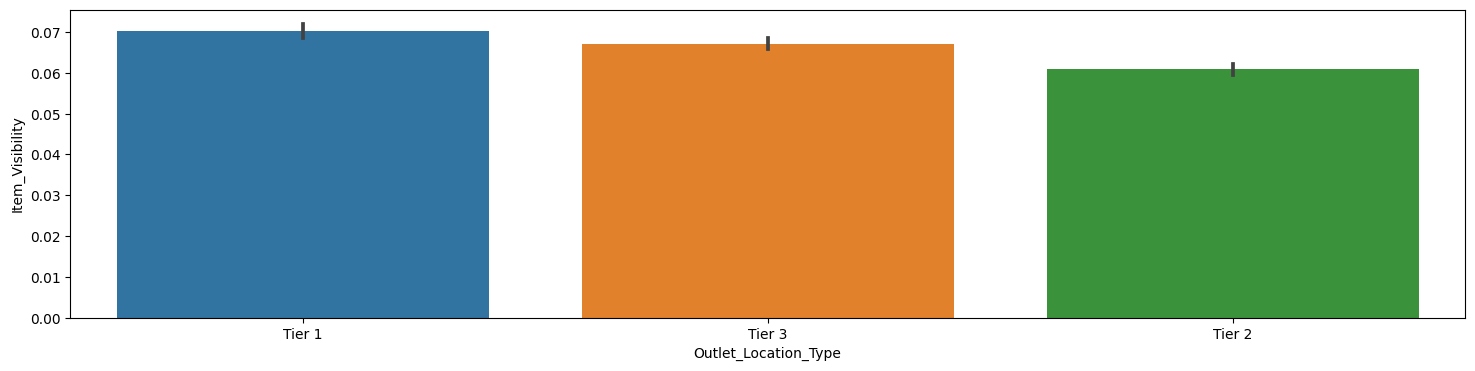

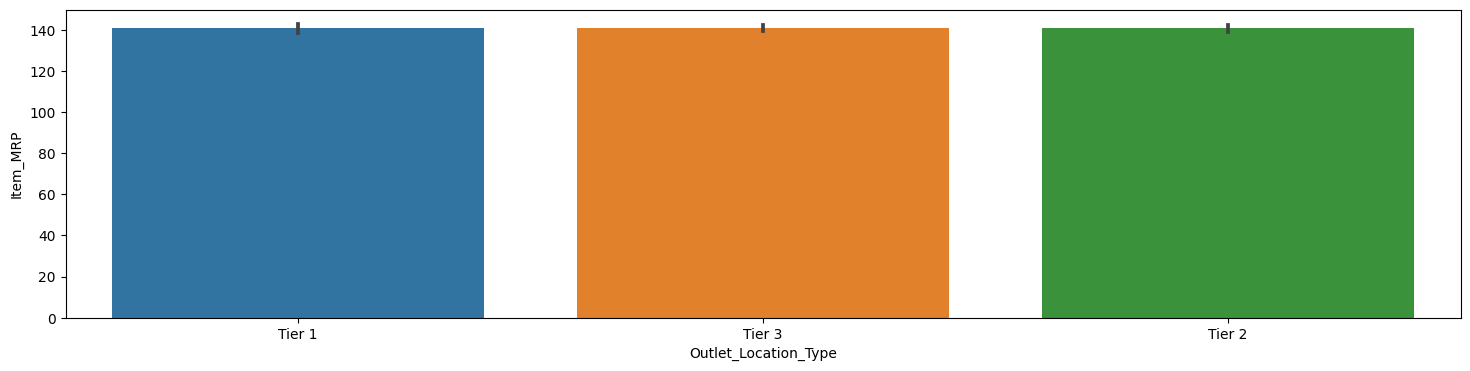

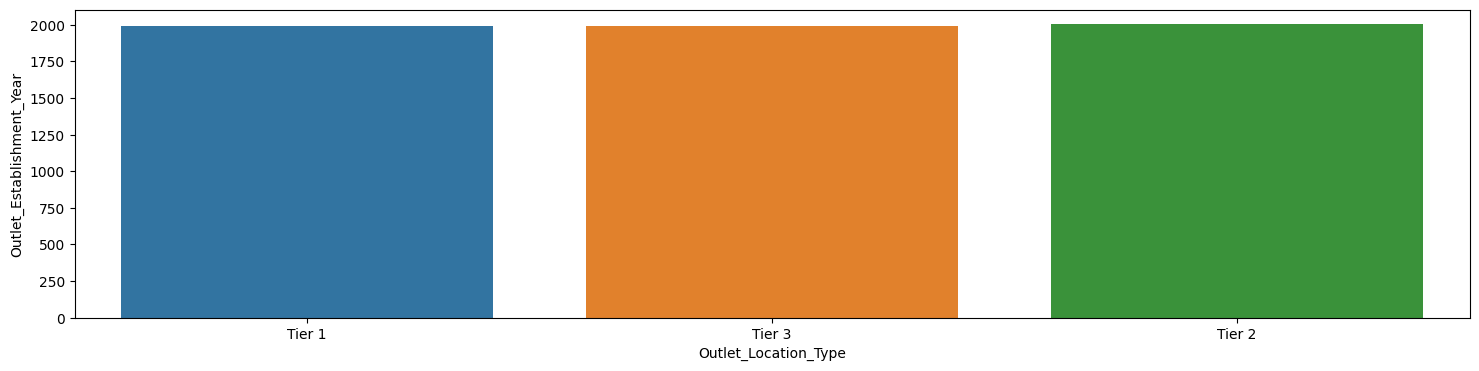

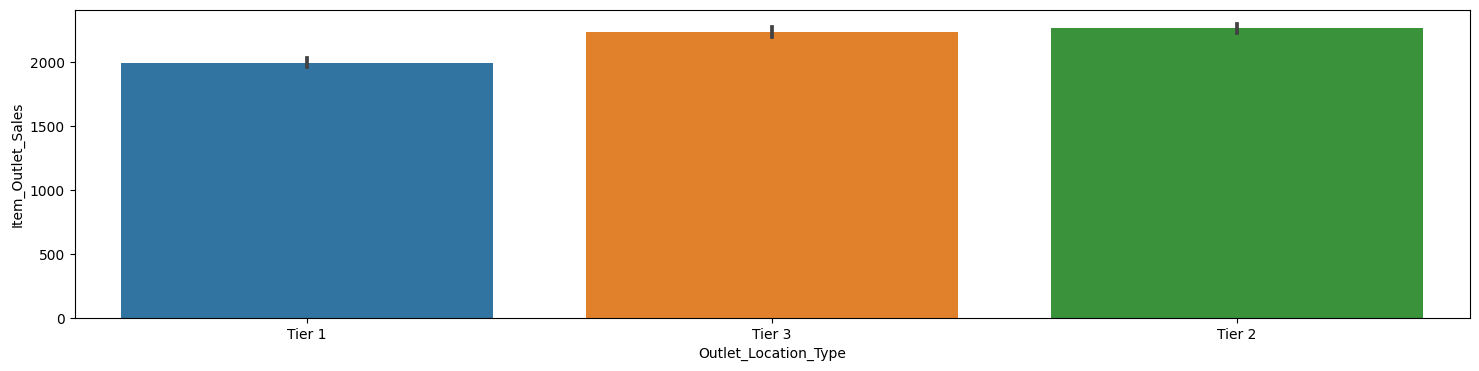

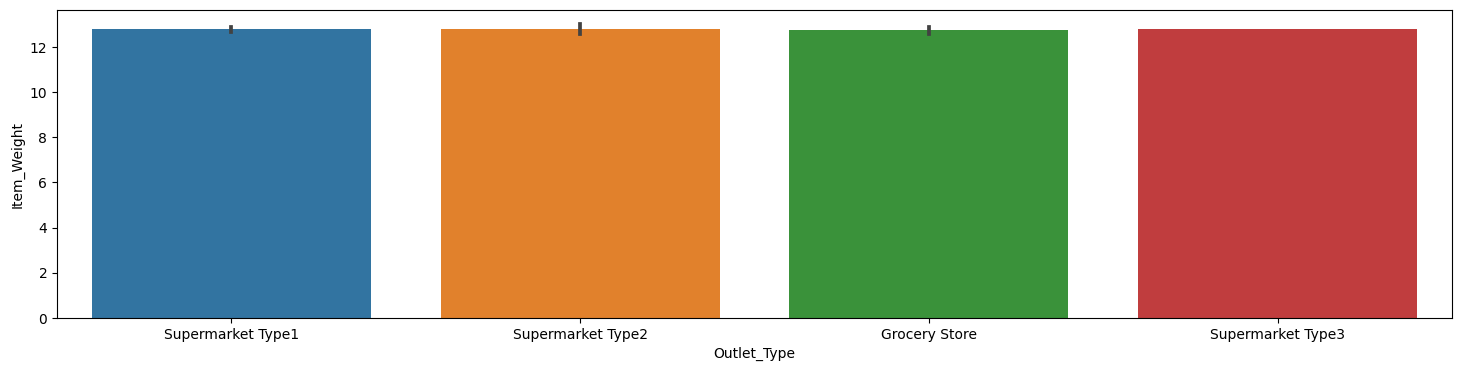

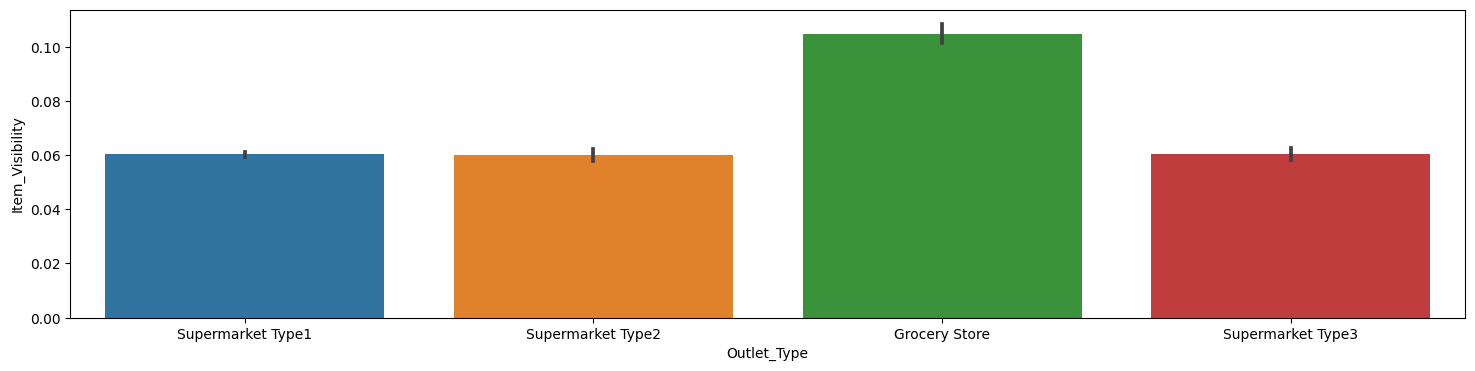

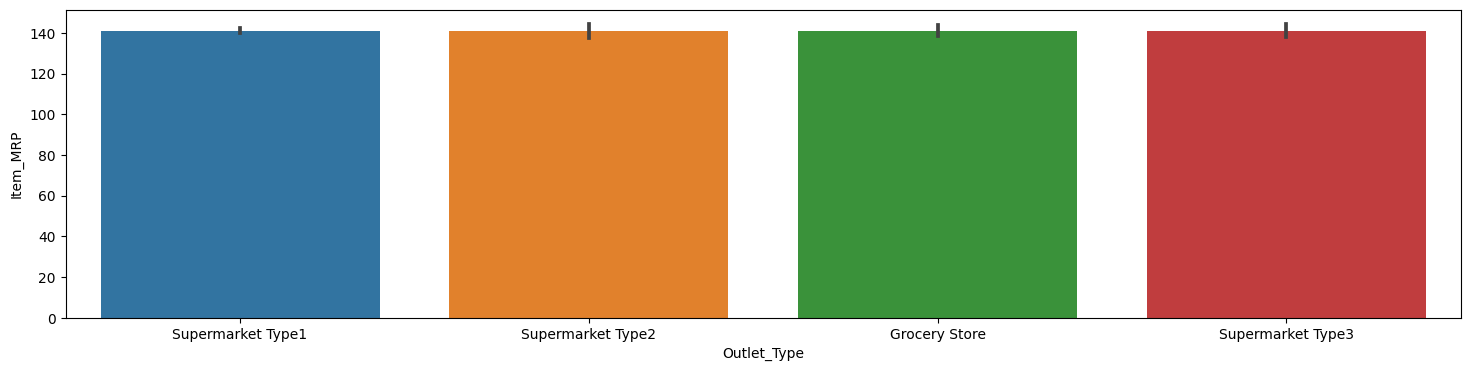

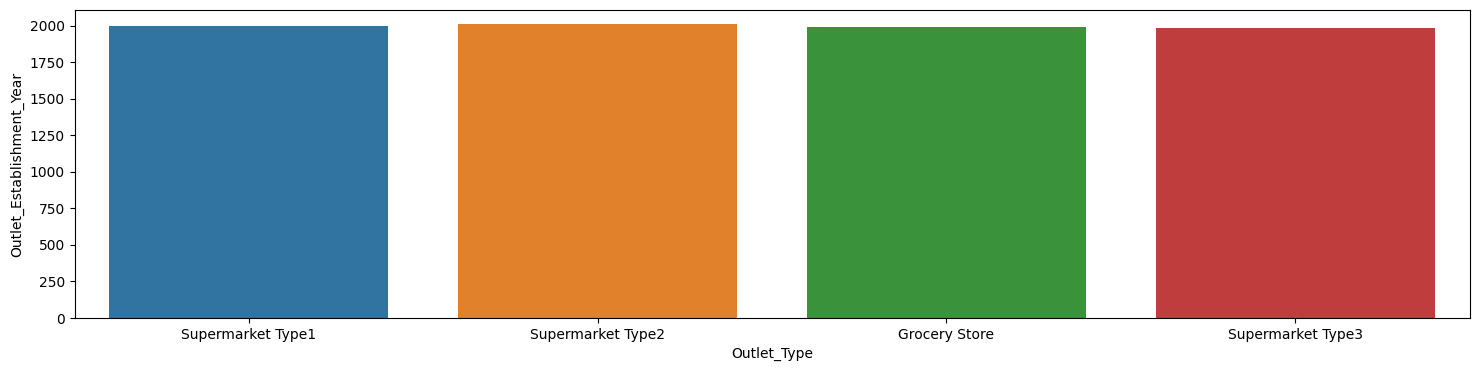

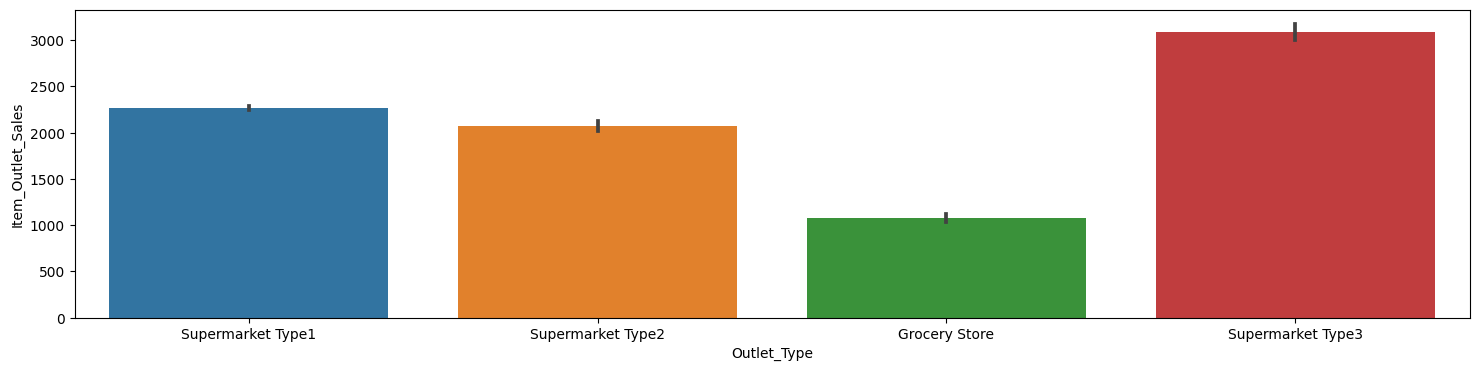

In [18]:
# Comparing the numerical and categorical columns
for c in categorical_columns:
    for n in numerical_columns:
        fig, ax = plt.subplots(1, 1, figsize = (18,4))
        sns.barplot(data = df, x = c, y = n)

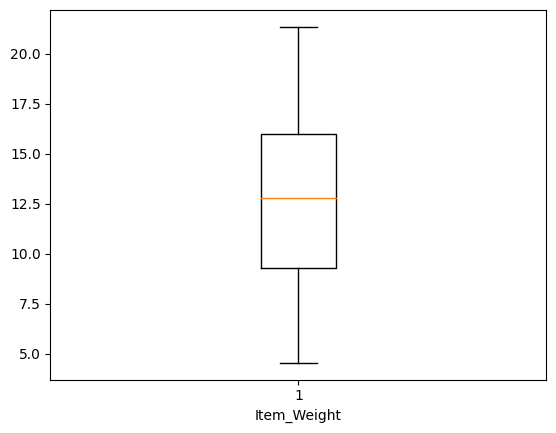

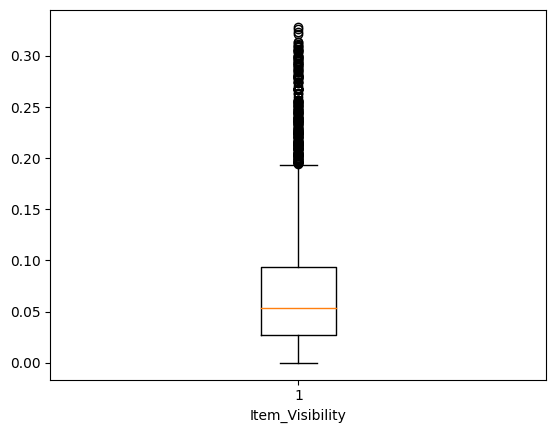

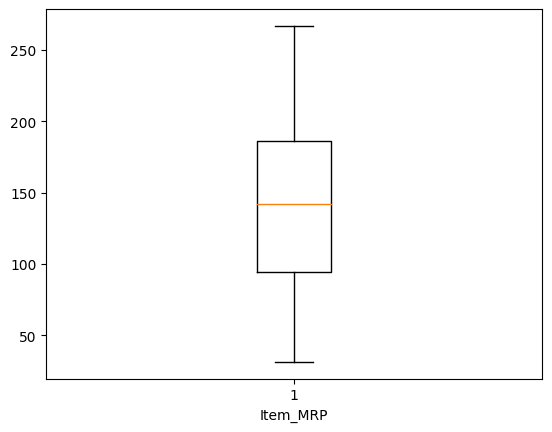

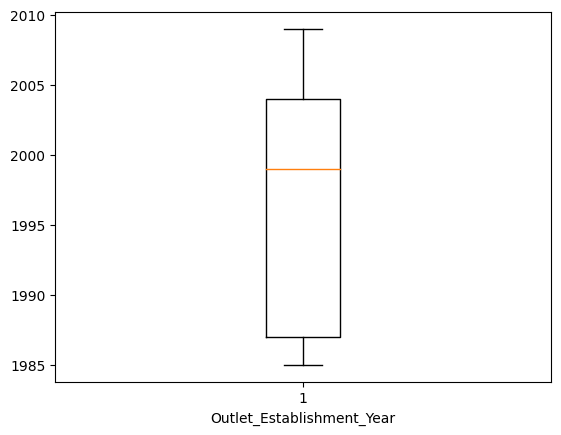

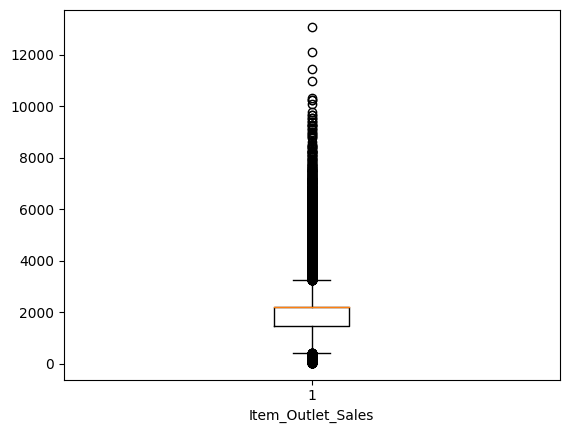

In [19]:
for n in numerical_columns:
    plt.boxplot(df[n])
    plt.xlabel(n)
    plt.show()

In [20]:
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1
df = df.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

<AxesSubplot:>

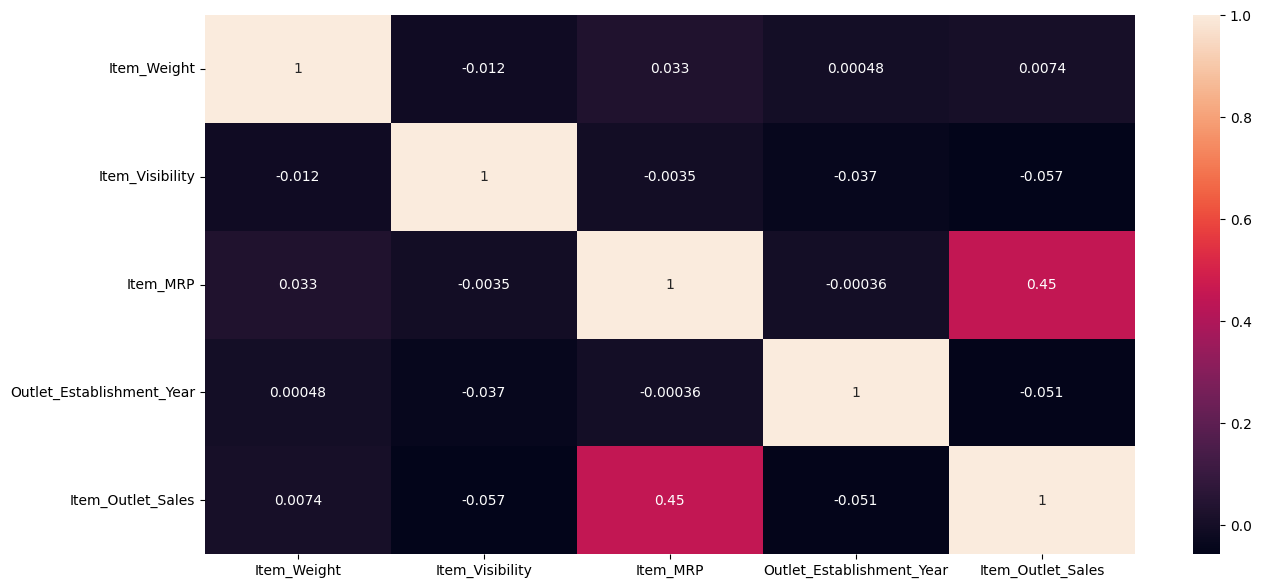

In [21]:
cor_mat = df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000
mean,12.797420,0.062629,141.049800,1997.952449,2200.843964
std,4.251448,0.045531,62.075285,8.354605,1320.243595
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026768,94.046200,1987.000000,1507.038300
50%,12.792854,0.052708,142.247000,1999.000000,2181.288914
75%,16.000000,0.091369,185.891100,2004.000000,2213.119200
max,21.350000,0.193773,266.888400,2009.000000,13086.964800


In [23]:
# Here the minimum value of  'Item_Visibility' is '0'which makes the model goes for wrong predictions.
df['Item_Visibility'].mask(df['Item_Visibility'] == 0,df['Item_Visibility'].mean(), inplace=True)

In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000
mean,12.797420,0.066578,141.049800,1997.952449,2200.843964
std,4.251448,0.042547,62.075285,8.354605,1320.243595
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.300000,0.032655,94.046200,1987.000000,1507.038300
50%,12.792854,0.060889,142.247000,1999.000000,2181.288914
75%,16.000000,0.091369,185.891100,2004.000000,2213.119200
max,21.350000,0.193773,266.888400,2009.000000,13086.964800


In [25]:
# Changing the categorical columns to numerical by using the label encoding method.
for c in categorical_columns:
    df[c] = le.fit_transform(df[c])

In [26]:
# Performing the one hot encoding for some categorical values which contains less than 3 unique values
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type'])

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,0,1,...,1,0,0,0,1,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,0,0,...,0,0,1,0,1,0,0,0,1,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,0,1,...,1,0,0,0,1,0,0,1,0,0
3,1121,19.20,0.062629,6,182.0950,0,1998,732.3800,0,0,...,0,0,1,0,1,0,1,0,0,0
4,1297,8.93,0.062629,9,53.8614,1,1987,994.7052,0,1,...,0,0,1,1,0,0,0,1,0,0


In [28]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
dtype: object

In [29]:
df.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,...,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000,13943.000000
mean,781.082909,12.797420,0.066578,7.234311,141.049800,4.772431,1997.952449,2200.843964,0.036291,0.599010,...,0.275837,0.332855,0.391307,0.111382,0.612781,0.275837,0.110737,0.666571,0.110880,0.111812
std,450.329565,4.251448,0.042547,4.211091,62.075285,2.826511,8.354605,1320.243595,0.187019,0.490117,...,0.446951,0.471252,0.488060,0.314616,0.487132,0.446951,0.313817,0.471455,0.313995,0.315147
min,0.000000,4.555000,0.003575,0.000000,31.290000,0.000000,1985.000000,33.290000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,391.000000,9.300000,0.032655,4.000000,94.046200,2.000000,1987.000000,1507.038300,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,783.000000,12.792854,0.060889,6.000000,142.247000,5.000000,1999.000000,2181.288914,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1170.500000,16.000000,0.091369,10.000000,185.891100,7.000000,2004.000000,2213.119200,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1558.000000,21.350000,0.193773,15.000000,266.888400,9.000000,2009.000000,13086.964800,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Splitting

In [30]:
# Here we are splitting the dependent variable and the independent
x = df.drop(['Item_Outlet_Sales'], axis = 1)
y = df.drop(x.columns, axis = 1)
print(x.shape)
print(y.shape)

(13943, 22)
(13943, 1)


In [31]:
print(x.head())
print(y.head())

   Item_Identifier  Item_Weight  Item_Visibility  Item_Type  Item_MRP  \
0              156         9.30         0.016047          4  249.8092   
1                8         5.92         0.019278         14   48.2692   
2              662        17.50         0.016760         10  141.6180   
3             1121        19.20         0.062629          6  182.0950   
4             1297         8.93         0.062629          9   53.8614   

   Outlet_Identifier  Outlet_Establishment_Year  Item_Fat_Content_0  \
0                  9                       1999                   0   
1                  3                       2009                   0   
2                  9                       1999                   0   
3                  0                       1998                   0   
4                  1                       1987                   0   

   Item_Fat_Content_1  Item_Fat_Content_2  ...  Outlet_Location_Type_0  \
0                   1                   0  ...              

In [32]:
# Here we splitting the data to training the model and as well as for the testing the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 0)

In [33]:
# Set up the different algorithms to train the model
rf_accuracy = round(rfr.score(x_train,y_train)*100,2)
rf_accuracy

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
mt.r2_score(y_train, rfr.predict(x_train))

In [ ]:
# Finding the best model based on the score
y_predict = lr.predict(x_test)

In [ ]:
MSE = mt.mean_squared_error(y_test, y_predict)
RMSE = math.sqrt(MSE)
MAE = mt.mean_absolute_error(y_test,y_predict)
print("Mean Square Error: ",MSE)
print("Root Mean Square Error: ",RMSE)
print("Mean Absolute Error: ",MAE)